# Bài 6: Pandas (part 4)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

## 1. Reshape data

### 1.1. Long vs. Wide data

In [2]:
# Load data
long_df = pd.read_csv("data/long_data.csv")
wide_df = pd.read_csv("data/wide_data.csv")

In [3]:
# View long data
long_df.head(5)

,attributes,datatype,date,station,value
0,",,H,0700",TMAX,2018-10-01T00:00:00,GHCND:USC00280907,21.1
1,",,H,0700",TMIN,2018-10-01T00:00:00,GHCND:USC00280907,8.9
2,",,H,0700",TOBS,2018-10-01T00:00:00,GHCND:USC00280907,13.9
3,",,H,0700",TMAX,2018-10-02T00:00:00,GHCND:USC00280907,23.9
4,",,H,0700",TMIN,2018-10-02T00:00:00,GHCND:USC00280907,13.9


In [4]:
# View wide data
wide_df.head(5)

,date,TMAX,TMIN,TOBS
0,2018-10-01,21.1,8.9,13.9
1,2018-10-02,23.9,13.9,17.2
2,2018-10-03,25.0,15.6,16.1
3,2018-10-04,22.8,11.7,11.7
4,2018-10-05,23.3,11.7,18.9


### 1.2. Đổi từ long -> wide

In [5]:
# Preview
long_df.head(3)

,attributes,datatype,date,station,value
0,",,H,0700",TMAX,2018-10-01T00:00:00,GHCND:USC00280907,21.1
1,",,H,0700",TMIN,2018-10-01T00:00:00,GHCND:USC00280907,8.9
2,",,H,0700",TOBS,2018-10-01T00:00:00,GHCND:USC00280907,13.9


In [6]:
# Unique value của cột datatype
long_df["datatype"].unique().tolist()

['TMAX', 'TMIN', 'TOBS']

In [7]:
# Pivot cột datatype thành 3 cột ứng với unique value
# Mỗi dòng là 1 ngày, mỗi cell có giá trị lấy từ cột value
long_df.pivot(index="date", columns="datatype", values="value").head(3)

datatype,TMAX,TMIN,TOBS
date,,,
2018-10-01T00:00:00,21.1,8.9,13.9
2018-10-02T00:00:00,23.9,13.9,17.2
2018-10-03T00:00:00,25.0,15.6,16.1


### 1.3. Đổi từ wide sang long

In [8]:
# Preview
wide_df.head(3)

,date,TMAX,TMIN,TOBS
0,2018-10-01,21.1,8.9,13.9
1,2018-10-02,23.9,13.9,17.2
2,2018-10-03,25.0,15.6,16.1


In [9]:
# Gom 3 cột TMAX, TMIN, TOBS thành 1 cột tên `temp_type`
# Các giá trị mỗi cell gom thành 1 cột khác tên `temp_value`
# Mỗi ngày bây giờ có 3 hàng ứng với 3 loại TMAX, TMIN, TOBS
wide_df.melt(
        id_vars=["date"],
        value_vars=["TMAX", "TMIN", "TOBS"],
        var_name="temp_type",
        value_name="temp_value"
    )\
    .head(3)

,date,temp_type,temp_value
0,2018-10-01,TMAX,21.1
1,2018-10-02,TMAX,23.9
2,2018-10-03,TMAX,25.0


### 1.3. Plotting using long vs. wide data

#### A) Wide

In [10]:
# Preview
wide_df.head(3)

,date,TMAX,TMIN,TOBS
0,2018-10-01,21.1,8.9,13.9
1,2018-10-02,23.9,13.9,17.2
2,2018-10-03,25.0,15.6,16.1


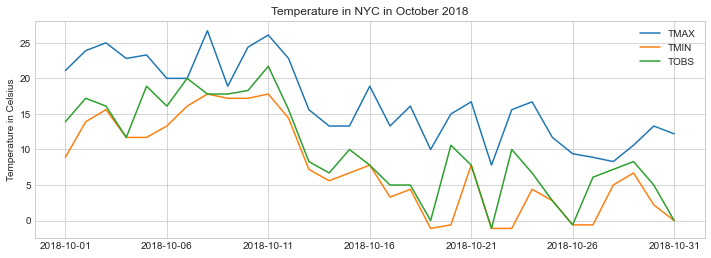

In [11]:
# Plot
fig, ax = plt.subplots(figsize=(12, 4))

wide_df.plot.line(
    x="date", 
    y=["TMAX", "TMIN", "TOBS"],
    ax=ax
)

ax.set_title("Temperature in NYC in October 2018")
ax.set_xlabel(None)
ax.set_ylabel('Temperature in Celsius')

plt.show()

#### B) Long

In [12]:
# Convert date to date time
long_df["date"] = pd.to_datetime(long_df["date"])
long_df.head(3)

,attributes,datatype,date,station,value
0,",,H,0700",TMAX,2018-10-01,GHCND:USC00280907,21.1
1,",,H,0700",TMIN,2018-10-01,GHCND:USC00280907,8.9
2,",,H,0700",TOBS,2018-10-01,GHCND:USC00280907,13.9


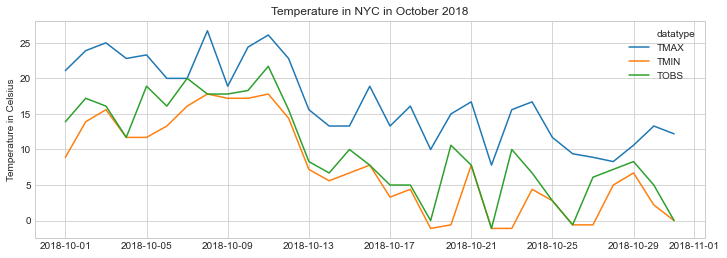

In [13]:
# Plot
fig, ax = plt.subplots(figsize=(12, 4))

sns.lineplot(
    x="date", 
    y="value",
    hue="datatype",
    data=long_df,
    ax=ax
)

ax.set_title("Temperature in NYC in October 2018")
ax.set_xlabel(None)
ax.set_ylabel('Temperature in Celsius')

plt.show()

## 2. Concatenate DFs

### 2.3. Vertically

#### Tạo data

In [14]:
df1 = pd.DataFrame({
    "name": ["Mr. A", "Mr. B", "Ms. C"],
    "age": [30, 25, 32],
    "salary": [1200, 2000, 1700],
    "source": "data file 1"
})

df1

,name,age,salary,source
0,Mr. A,30,1200,data file 1
1,Mr. B,25,2000,data file 1
2,Ms. C,32,1700,data file 1


In [15]:
df2 = pd.DataFrame({
    "name": ["Ms. X", "Mr. Y"],
    "age": [35, 42],
    "salary": [2300, 1200],
    "source": "data file 2"
})

df2

,name,age,salary,source
0,Ms. X,35,2300,data file 2
1,Mr. Y,42,1200,data file 2


#### Concatenate

In [16]:
pd.concat([df1, df2], ignore_index=True)

,name,age,salary,source
0,Mr. A,30,1200,data file 1
1,Mr. B,25,2000,data file 1
2,Ms. C,32,1700,data file 1
3,Ms. X,35,2300,data file 2
4,Mr. Y,42,1200,data file 2


### 2.3. Horizontally
(Ít gặp)

#### Tạo data

In [17]:
df1 = pd.DataFrame({
    "name": ["Mr. A", "Mr. B", "Ms. C"],
    "age": [30, 25, 32],
    "salary": [1200, 2000, 1700]
})

df1

,name,age,salary
0,Mr. A,30,1200
1,Mr. B,25,2000
2,Ms. C,32,1700


In [18]:
df2 = pd.DataFrame({
    "city": ["HN", "HCM"],
    "district": ["Hoan Kiem", "Q1"]
})

df2

,city,district
0,HN,Hoan Kiem
1,HCM,Q1


In [19]:
pd.concat([df1, df2], axis=1)

,name,age,salary,city,district
0,Mr. A,30,1200,HN,Hoan Kiem
1,Mr. B,25,2000,HCM,Q1
2,Ms. C,32,1700,NaN,NaN


## 3. Join / Merge DFs by columns

### 3.1. Minh họa
![](https://d33wubrfki0l68.cloudfront.net/108c0749d084c03103f8e1e8276c20e06357b124/5f113/diagrams/join-setup.png)

![](https://d33wubrfki0l68.cloudfront.net/820b012580731f2134f90ee9c6388994c2343683/27703/diagrams/join-setup2.png)

#### A) Inner
![](https://d33wubrfki0l68.cloudfront.net/3abea0b730526c3f053a3838953c35a0ccbe8980/7f29b/diagrams/join-inner.png)

#### B) Outer (left / right / full)
![](https://d33wubrfki0l68.cloudfront.net/9c12ca9e12ed26a7c5d2aa08e36d2ac4fb593f1e/79980/diagrams/join-outer.png)

#### C) Ven diagrams
![](https://d33wubrfki0l68.cloudfront.net/aeab386461820b029b7e7606ccff1286f623bae1/ef0d4/diagrams/join-venn.png)

### 3.2. Merge data with pandas

#### 3.2.1. Tạo data

In [20]:
df1 = pd.DataFrame({
    "id": [1, 2, 3],
    "name": ["John", "Mary", "Louis"]
})

df2 = pd.DataFrame({
    "id": [1, 2, 4],
    "country": ["US", "CA", "FR"]
})

display(df1)
display(df2)

,id,name
0,1,John
1,2,Mary
2,3,Louis


,id,country
0,1,US
1,2,CA
2,4,FR


In [21]:
# Inner join
pd.merge(df1, df2, how="inner", on=["id"])

,id,name,country
0,1,John,US
1,2,Mary,CA


In [22]:
# Left (outer) join
pd.merge(df1, df2, how="left", on=["id"])

,id,name,country
0,1,John,US
1,2,Mary,CA
2,3,Louis,NaN


In [23]:
# Right (outer) join
pd.merge(df1, df2, how="right", on=["id"])

,id,name,country
0,1,John,US
1,2,Mary,CA
2,4,NaN,FR


In [24]:
# Full (outer) join
pd.merge(df1, df2, how="outer", on=["id"])

,id,name,country
0,1,John,US
1,2,Mary,CA
2,3,Louis,NaN
3,4,NaN,FR


## 4. Dirty data

### 4.1. Load data

In [25]:
df = pd.read_csv("data/dirty_data.csv")
df.head(3)

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
0,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
1,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
2,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN


### 4.2. Find and replace

In [26]:
# Replace "?" hoặc "" bằng NaN
df.replace(to_replace=["?", ""], value=np.nan, inplace=True)
df.head(3)

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
0,2018-01-01T00:00:00,NaN,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
1,2018-01-01T00:00:00,NaN,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
2,2018-01-01T00:00:00,NaN,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN


In [27]:
# Replace inf với 0
df.replace(to_replace=[-np.infty, np.infty], value=0, inplace=True)
df.head(3)

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
0,2018-01-01T00:00:00,NaN,0.0,0.0,0.0,5505.0,-40.0,NaN,NaN,NaN
1,2018-01-01T00:00:00,NaN,0.0,0.0,0.0,5505.0,-40.0,NaN,NaN,NaN
2,2018-01-01T00:00:00,NaN,0.0,0.0,0.0,5505.0,-40.0,NaN,NaN,NaN


In [28]:
# Replace NaN của 
df.replace(to_replace=[-np.infty, np.infty], value=0, inplace=True)
df.head(3)

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
0,2018-01-01T00:00:00,NaN,0.0,0.0,0.0,5505.0,-40.0,NaN,NaN,NaN
1,2018-01-01T00:00:00,NaN,0.0,0.0,0.0,5505.0,-40.0,NaN,NaN,NaN
2,2018-01-01T00:00:00,NaN,0.0,0.0,0.0,5505.0,-40.0,NaN,NaN,NaN


### 4.3. Fill NA

In [29]:
# Fill NaN của cột WESF bằng "Unknown", NaN của cột TOBS bằng 0
df.fillna({"WESF": "Unknown", "TOBS": 0}, inplace=True)
df.head(3)

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
0,2018-01-01T00:00:00,NaN,0.0,0.0,0.0,5505.0,-40.0,0.0,Unknown,NaN
1,2018-01-01T00:00:00,NaN,0.0,0.0,0.0,5505.0,-40.0,0.0,Unknown,NaN
2,2018-01-01T00:00:00,NaN,0.0,0.0,0.0,5505.0,-40.0,0.0,Unknown,NaN


### 4.4. Drop NA

In [30]:
# Tạo data
df = pd.DataFrame({
    "c1": [1, 2, np.nan, np.nan],
    "c2": ["A", "B", "C", np.nan],
    "c3": [1.5, np.nan, 3, np.nan]
})

df

,c1,c2,c3
0,1.0,A,1.5
1,2.0,B,NaN
2,NaN,C,3.0
3,NaN,NaN,NaN


In [31]:
# Drop những dòng mà có ít nhất 1 cell có NaN
# Muốn lưu thay đổi set inplace=True
df.dropna()

,c1,c2,c3
0,1.0,A,1.5


In [32]:
# Drop những dòng mà tất cả các cell đều là NaN
# Muốn lưu thay đổi set inplace=True
df.dropna(how="all")

,c1,c2,c3
0,1.0,A,1.5
1,2.0,B,NaN
2,NaN,C,3.0


In [33]:
# Drop những dòng ứng với cột c3 là NaN
# Muốn lưu thay đổi set inplace=True
df.dropna(subset=["c3"])

,c1,c2,c3
0,1.0,A,1.5
2,NaN,C,3.0


## 5. Dummy variables

### 5.1. VD 1

In [34]:
# Tạo data
df = pd.DataFrame({
    'id': range(1, 5),
    'sex': ['male', 'male', 'female', 'male'],
    'age': [18, 19, 22, 15]

})

df

,id,sex,age
0,1,male,18
1,2,male,19
2,3,female,22
3,4,male,15


In [35]:
# Get dummies
pd.get_dummies(df["sex"])

,female,male
0,0,1
1,0,1
2,1,0
3,0,1


In [36]:
# Get dummies with prefix
pd.get_dummies(df["sex"], prefix="is")

,is_female,is_male
0,0,1
1,0,1
2,1,0
3,0,1


In [37]:
# Get dummies drop first
sex_dummies = pd.get_dummies(df["sex"], prefix="is", drop_first=True)
sex_dummies

,is_male
0,1
1,1
2,0
3,1


In [38]:
# Combine với orginal data dùng concat
pd.concat([df, sex_dummies], axis=1)

,id,sex,age,is_male
0,1,male,18,1
1,2,male,19,1
2,3,female,22,0
3,4,male,15,1


In [39]:
# Combine với orginal data dùng join
df.join(sex_dummies)

,id,sex,age,is_male
0,1,male,18,1
1,2,male,19,1
2,3,female,22,0
3,4,male,15,1


In [40]:
# Combine với orginal data, bỏ đi cột sex vì không cần thiết
df.join(sex_dummies).drop(columns=["sex"])

,id,age,is_male
0,1,18,1
1,2,19,1
2,3,22,0
3,4,15,1


### 5.2. VD 2

In [41]:
# Tạo data
df = pd.DataFrame({
    'id': range(1, 8),
    'sex': ['male', 'male', 'female', 'male', 'male', 'female', 'male'],
    'ranking': ["Excellent", "Excellent", "Good", "Avg", "Avg", "Failed", "Failed"]
})

df

,id,sex,ranking
0,1,male,Excellent
1,2,male,Excellent
2,3,female,Good
3,4,male,Avg
4,5,male,Avg
5,6,female,Failed
6,7,male,Failed


In [42]:
# Tạo dummies
ranking_dummies = pd.get_dummies(df["ranking"], prefix="is", drop_first=True)
sex_dummies = pd.get_dummies(df["sex"], prefix="is", drop_first=True)

In [43]:
# View dummies
display(ranking_dummies.head(2))
display(sex_dummies.head(2))

,is_Excellent,is_Failed,is_Good
0,1,0,0
1,1,0,0


,is_male
0,1
1,1


In [44]:
# Join với data ban đầu
df\
    .join(sex_dummies)\
    .join(ranking_dummies)\
    .drop(columns=["sex", "ranking"])

,id,is_male,is_Excellent,is_Failed,is_Good
0,1,1,1,0,0
1,2,1,1,0,0
2,3,0,0,0,1
3,4,1,0,0,0
4,5,1,0,0,0
5,6,0,0,1,0
6,7,1,0,1,0


## 6. Output

### 6.1. VD 1

In [45]:
# Load data
df = pd.read_excel("data/invoice/invoice_2011_07.xlsx")
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,559518,21989,PACK OF 20 SKULL PAPER NAPKINS,6,07/08/2011 16:11,1.63,NaN,United Kingdom
1,559518,22055,MINI CAKE STAND HANGING STRAWBERY,1,07/08/2011 16:11,3.29,NaN,United Kingdom


- Lấy ra top 5 quốc gia có doanh thu cao nhất
- Ghi kết quả ra file `top5_countries_in_sales.xlsx`

In [46]:
# Tạo cột revenue
df["Revenue"] = df["Quantity"] * df["UnitPrice"]
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,559518,21989,PACK OF 20 SKULL PAPER NAPKINS,6,07/08/2011 16:11,1.63,NaN,United Kingdom,9.78
1,559518,22055,MINI CAKE STAND HANGING STRAWBERY,1,07/08/2011 16:11,3.29,NaN,United Kingdom,3.29


In [47]:
# Group by country rồi tính tổng revenue cho từng country sau đó lấy top 5
top5 = df.groupby("Country")["Revenue"].sum().nlargest(5).reset_index()
top5

,Country,Revenue
0,United Kingdom,399731.101
1,EIRE,39582.820
2,Germany,12470.990
3,France,6068.450
4,Australia,4767.570


In [48]:
# Xuất ra file excel
top5.to_excel("top5_countries_in_sales.xlsx", index=False)

In [49]:
# Xuất ra file CSV
top5.to_csv("top5_countries_in_sales.csv", index=False)

### 6.2. VD 2 

- Làm như VD1 nhưng chạy tự động cho tất cả các tháng

#### A) Cách 1

In [50]:
input_files = [
    "data/invoice/invoice_2011_07.xlsx",
    "data/invoice/invoice_2011_08.xlsx",
    "data/invoice/invoice_2011_09.xlsx",
    "data/invoice/invoice_2011_10.xlsx",
    "data/invoice/invoice_2011_11.xlsx",
    "data/invoice/invoice_2011_12.xlsx"
]

In [51]:
for f in input_files:
    print("-" * 50)
    print("Input: {}".format(f))
    
    # Load data
    df = pd.read_excel(f)
    
    # Create revenue column
    df["Revenue"] = df["Quantity"] * df["UnitPrice"]
    
    # Get top 5
    top5 = df.groupby("Country")["Revenue"].sum().nlargest().reset_index()
    
    # Get the month
    month_part = f[-12:-5]
    output_file = "output/top5_countries_{}.xlsx".format(month_part)
    print("Output: {}".format(output_file))
    
    # Export
    top5.to_excel(output_file, index=False)

--------------------------------------------------
Input: data/invoice/invoice_2011_07.xlsx
Output: output/top5_countries_2011_07.xlsx
--------------------------------------------------
Input: data/invoice/invoice_2011_08.xlsx
Output: output/top5_countries_2011_08.xlsx
--------------------------------------------------
Input: data/invoice/invoice_2011_09.xlsx
Output: output/top5_countries_2011_09.xlsx
--------------------------------------------------
Input: data/invoice/invoice_2011_10.xlsx
Output: output/top5_countries_2011_10.xlsx
--------------------------------------------------
Input: data/invoice/invoice_2011_11.xlsx
Output: output/top5_countries_2011_11.xlsx
--------------------------------------------------
Input: data/invoice/invoice_2011_12.xlsx
Output: output/top5_countries_2011_12.xlsx


#### B) Cách 2

In [52]:
# Define logic
def get_top5(f, output_folder):
    print("Input: {}".format(f))
    
    # Load data
    df = pd.read_excel(f)
    
    # Create revenue column
    df["Revenue"] = df["Quantity"] * df["UnitPrice"]
    
    # Get top 5
    top5 = df.groupby("Country")["Revenue"].sum().nlargest().reset_index()
    
    # Get the month
    month_part = f[-12:-5]
    output_file = "{}/top5_countries_{}.xlsx".format(output_folder, month_part)
    print("Output: {}".format(output_file))
    
    # Export
    top5.to_excel(output_file, index=False)

In [53]:
# Run for all files
for f in input_files:
    print("-" * 50)
    get_top5(f, output_folder="output")

--------------------------------------------------
Input: data/invoice/invoice_2011_07.xlsx
Output: output/top5_countries_2011_07.xlsx
--------------------------------------------------
Input: data/invoice/invoice_2011_08.xlsx
Output: output/top5_countries_2011_08.xlsx
--------------------------------------------------
Input: data/invoice/invoice_2011_09.xlsx
Output: output/top5_countries_2011_09.xlsx
--------------------------------------------------
Input: data/invoice/invoice_2011_10.xlsx
Output: output/top5_countries_2011_10.xlsx
--------------------------------------------------
Input: data/invoice/invoice_2011_11.xlsx
Output: output/top5_countries_2011_11.xlsx
--------------------------------------------------
Input: data/invoice/invoice_2011_12.xlsx
Output: output/top5_countries_2011_12.xlsx
